In [44]:
import pyreadstat
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import numpy as np
import math


# Path to your .sav file
sav_path = "DS0001/04652-0001-Data.sav" 
# Selected variables and their descriptions
midus_vars = {
    #"M2ID": "MIDUS 2 ID number",
    "B1PRAGE_2019": "age",
    "B1PRSEX": "Male:1 Female:2",
    "B1PB1": "Highest level of education completed",
    #"B1PB19": "Marital status currently",
    "B1PB3A": "Currently working",
    "B1PA1": "Physical health self-evaluated",
    "B1PA2": "Mental/emotional health self-evaluated",
    #"B1PA6D": "History of other neurological disorder",
    #"B1SA11Y": "Neurological disorder ever (12 months)",
    #"B1SA11U": "Alcohol/drug problem ever (12 months)",
    #"B1SA1": "Current health rating",
    "B1SA11T": "Anxiety/depression past year",
    "B1SA11V": "Migraines past year",
    "B1SA11W": "Chronic sleep problems past year",
    "B1SG1": "Financial situation rating",
    "B1SG6": "Money meets needs",
    "B1SJ1": "Contact with family",
    "B1SJ2A": "Family cares about you",
    "B1SJ4A": "Friends care about you",
    "B1SL1": "Marriage/relationship rating",
    "B1SM1": "Sex life rating",
    "B1SQ1": "Overall life rating",
    "B1PG1": "Satisfied with life at present",
    #"B1SQ6": "How is your day"
}

# Load only the selected columns
columns_to_load = list(midus_vars.keys())
df, meta = pyreadstat.read_sav(sav_path, usecols=columns_to_load)

# Replace known non-response codes with NaN
non_response_codes = [-1, -2, -3, -7, 9999]
df.replace(non_response_codes, pd.NA, inplace=True)
df.dropna(inplace=True)


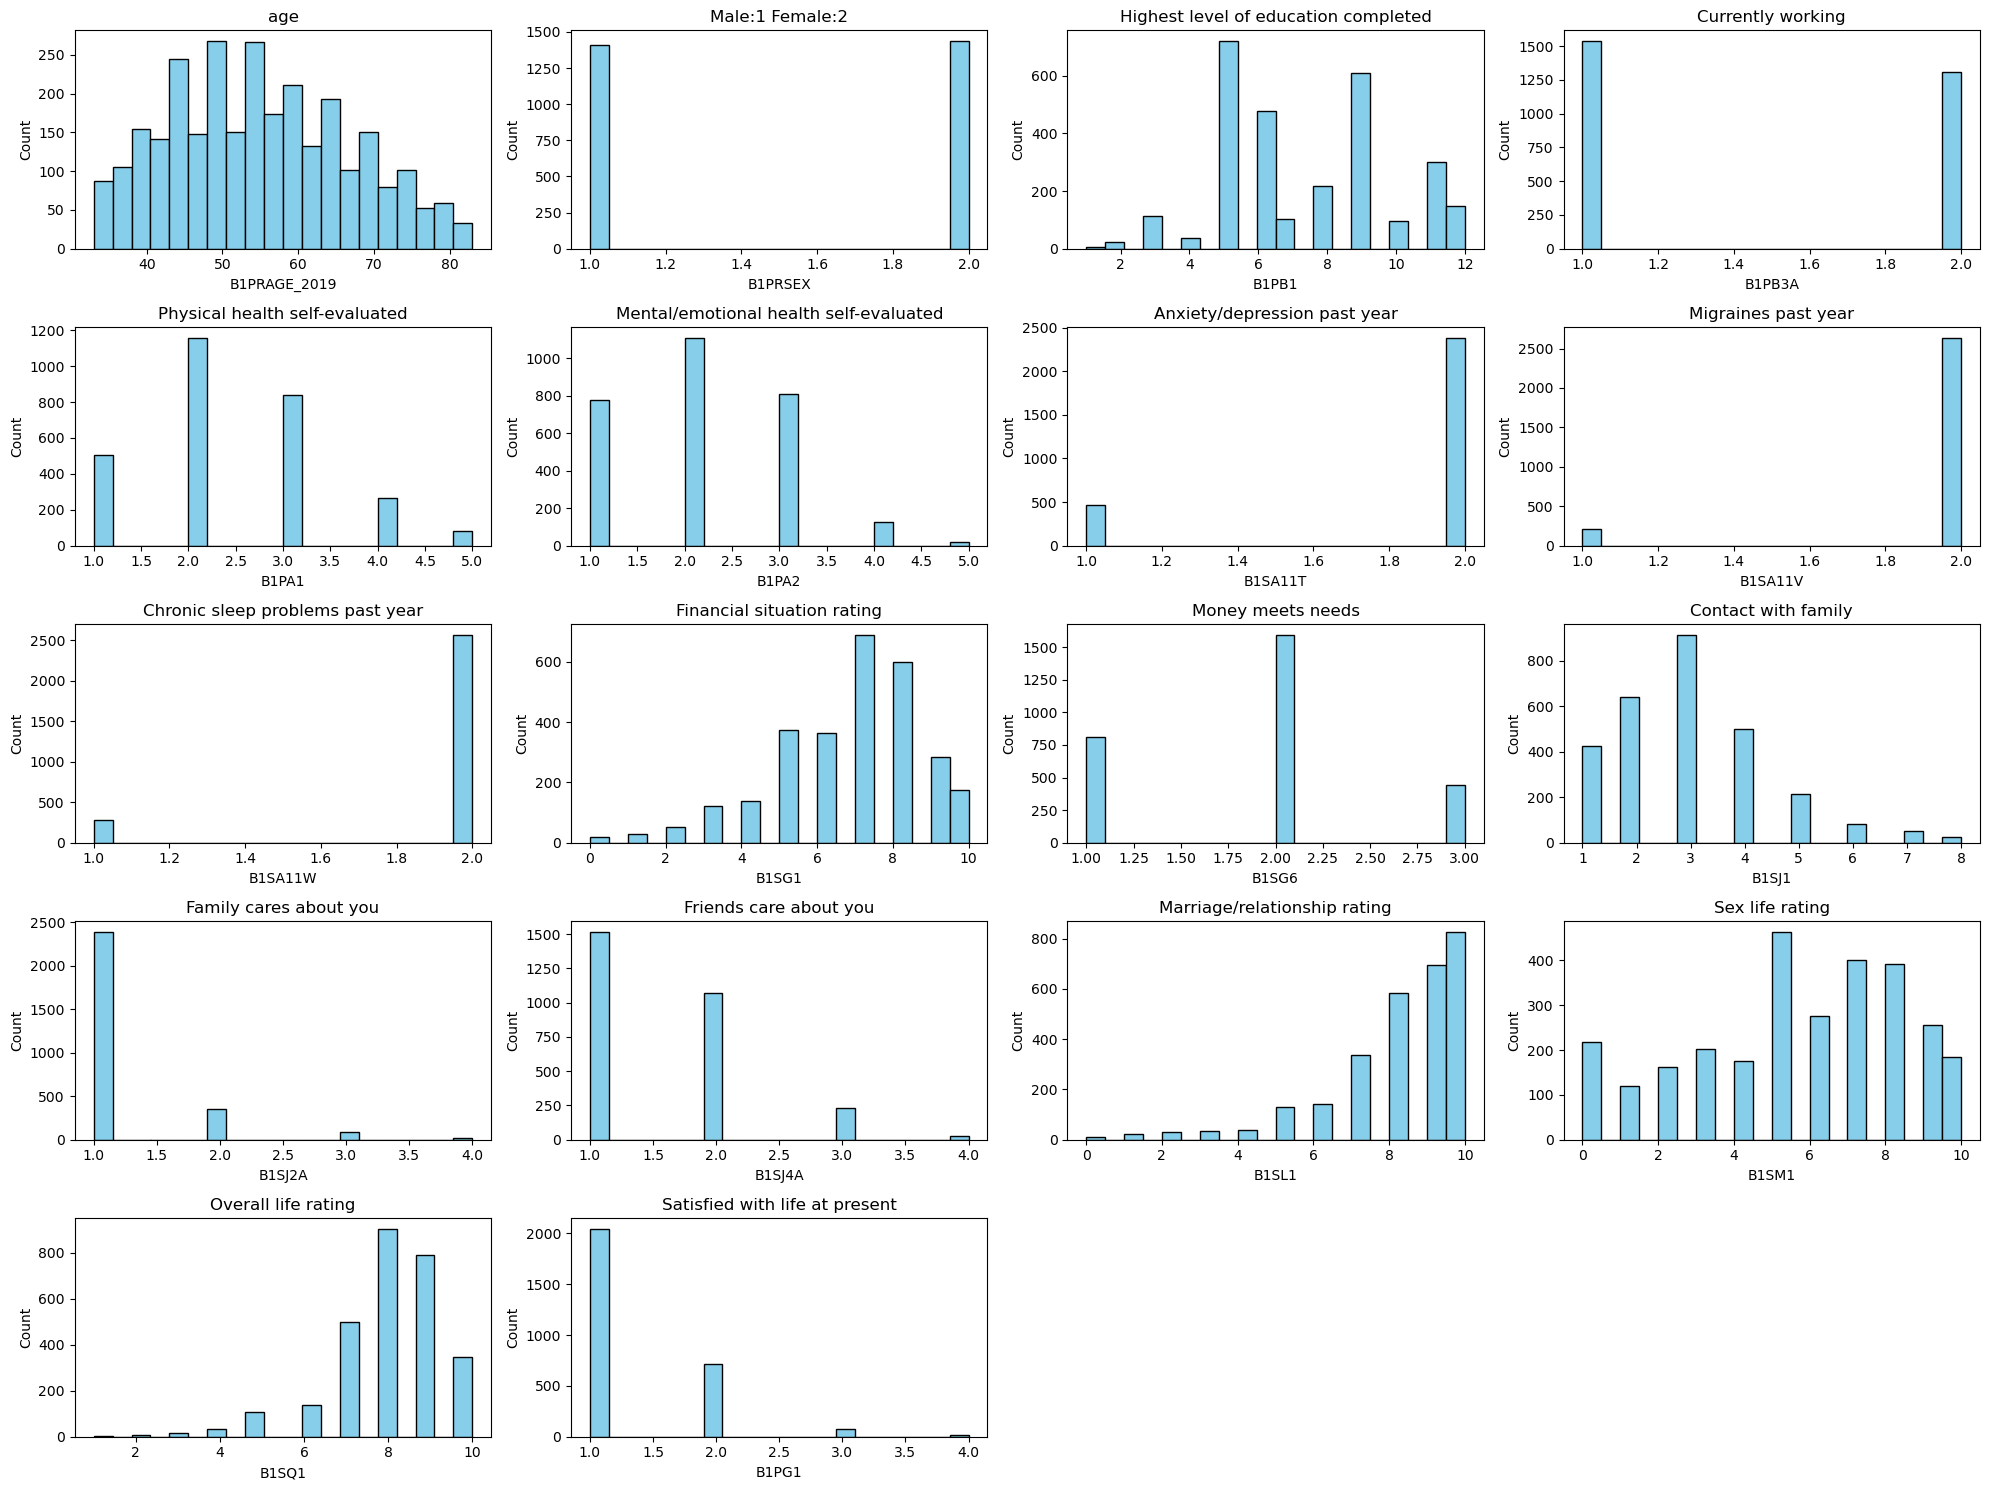

In [46]:
# Plot histograms
num_vars = len(midus_vars)
fig, axes = plt.subplots(nrows=(num_vars + 3) // 4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, var in enumerate(midus_vars):
    axes[i].hist(df[var], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{midus_vars[var]}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


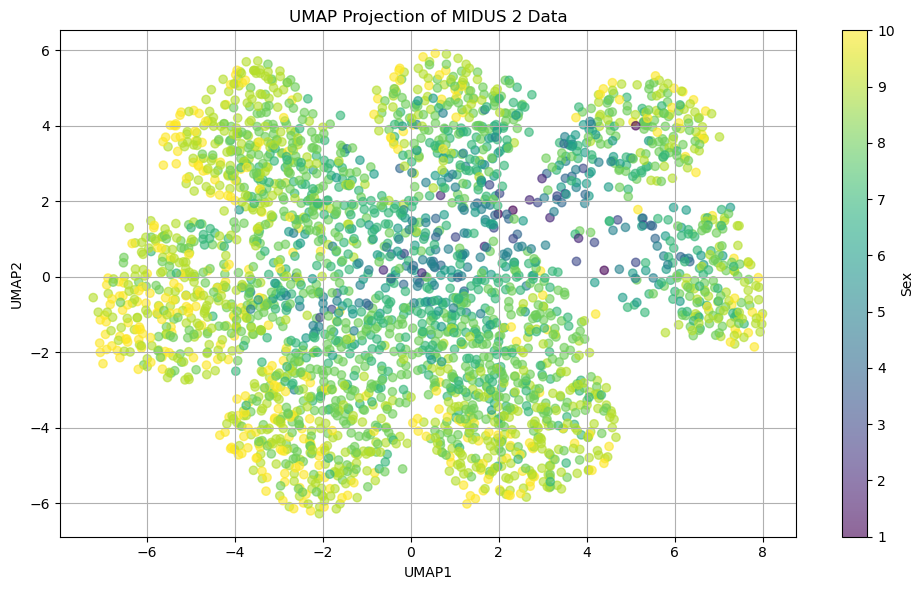

In [48]:
# Rename columns
df.rename(columns=midus_vars, inplace=True)

# Drop rows with any missing values or codes like -1, -2, 9999
non_response_codes = [-1, -2, -3, -7, 9999]
df_clean = df.copy()

# Replace special missing values with NaN
df_clean.replace(non_response_codes, pd.NA, inplace=True)

# Drop rows with any missing/NA values
df_clean.dropna(inplace=True)

# Exclude ID columns and scale data
features = df_clean.drop(columns=["MIDUS 2 ID number"], errors="ignore")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.8, metric='euclidean',random_state=23)
embedding = umap_model.fit_transform(scaled_data)

# Create a DataFrame for UMAP output
df_umapo = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
df_umapo = pd.concat([df_umapo, df_clean.reset_index(drop=True)], axis=1)

# Plot UMAP, colored by one example variable (e.g., Sex)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_umapo["UMAP1"], df_umapo["UMAP2"], c=df_umapo["Overall life rating"], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label="Sex")
plt.title("UMAP Projection of MIDUS 2 Data")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(True)
plt.tight_layout()
plt.show()


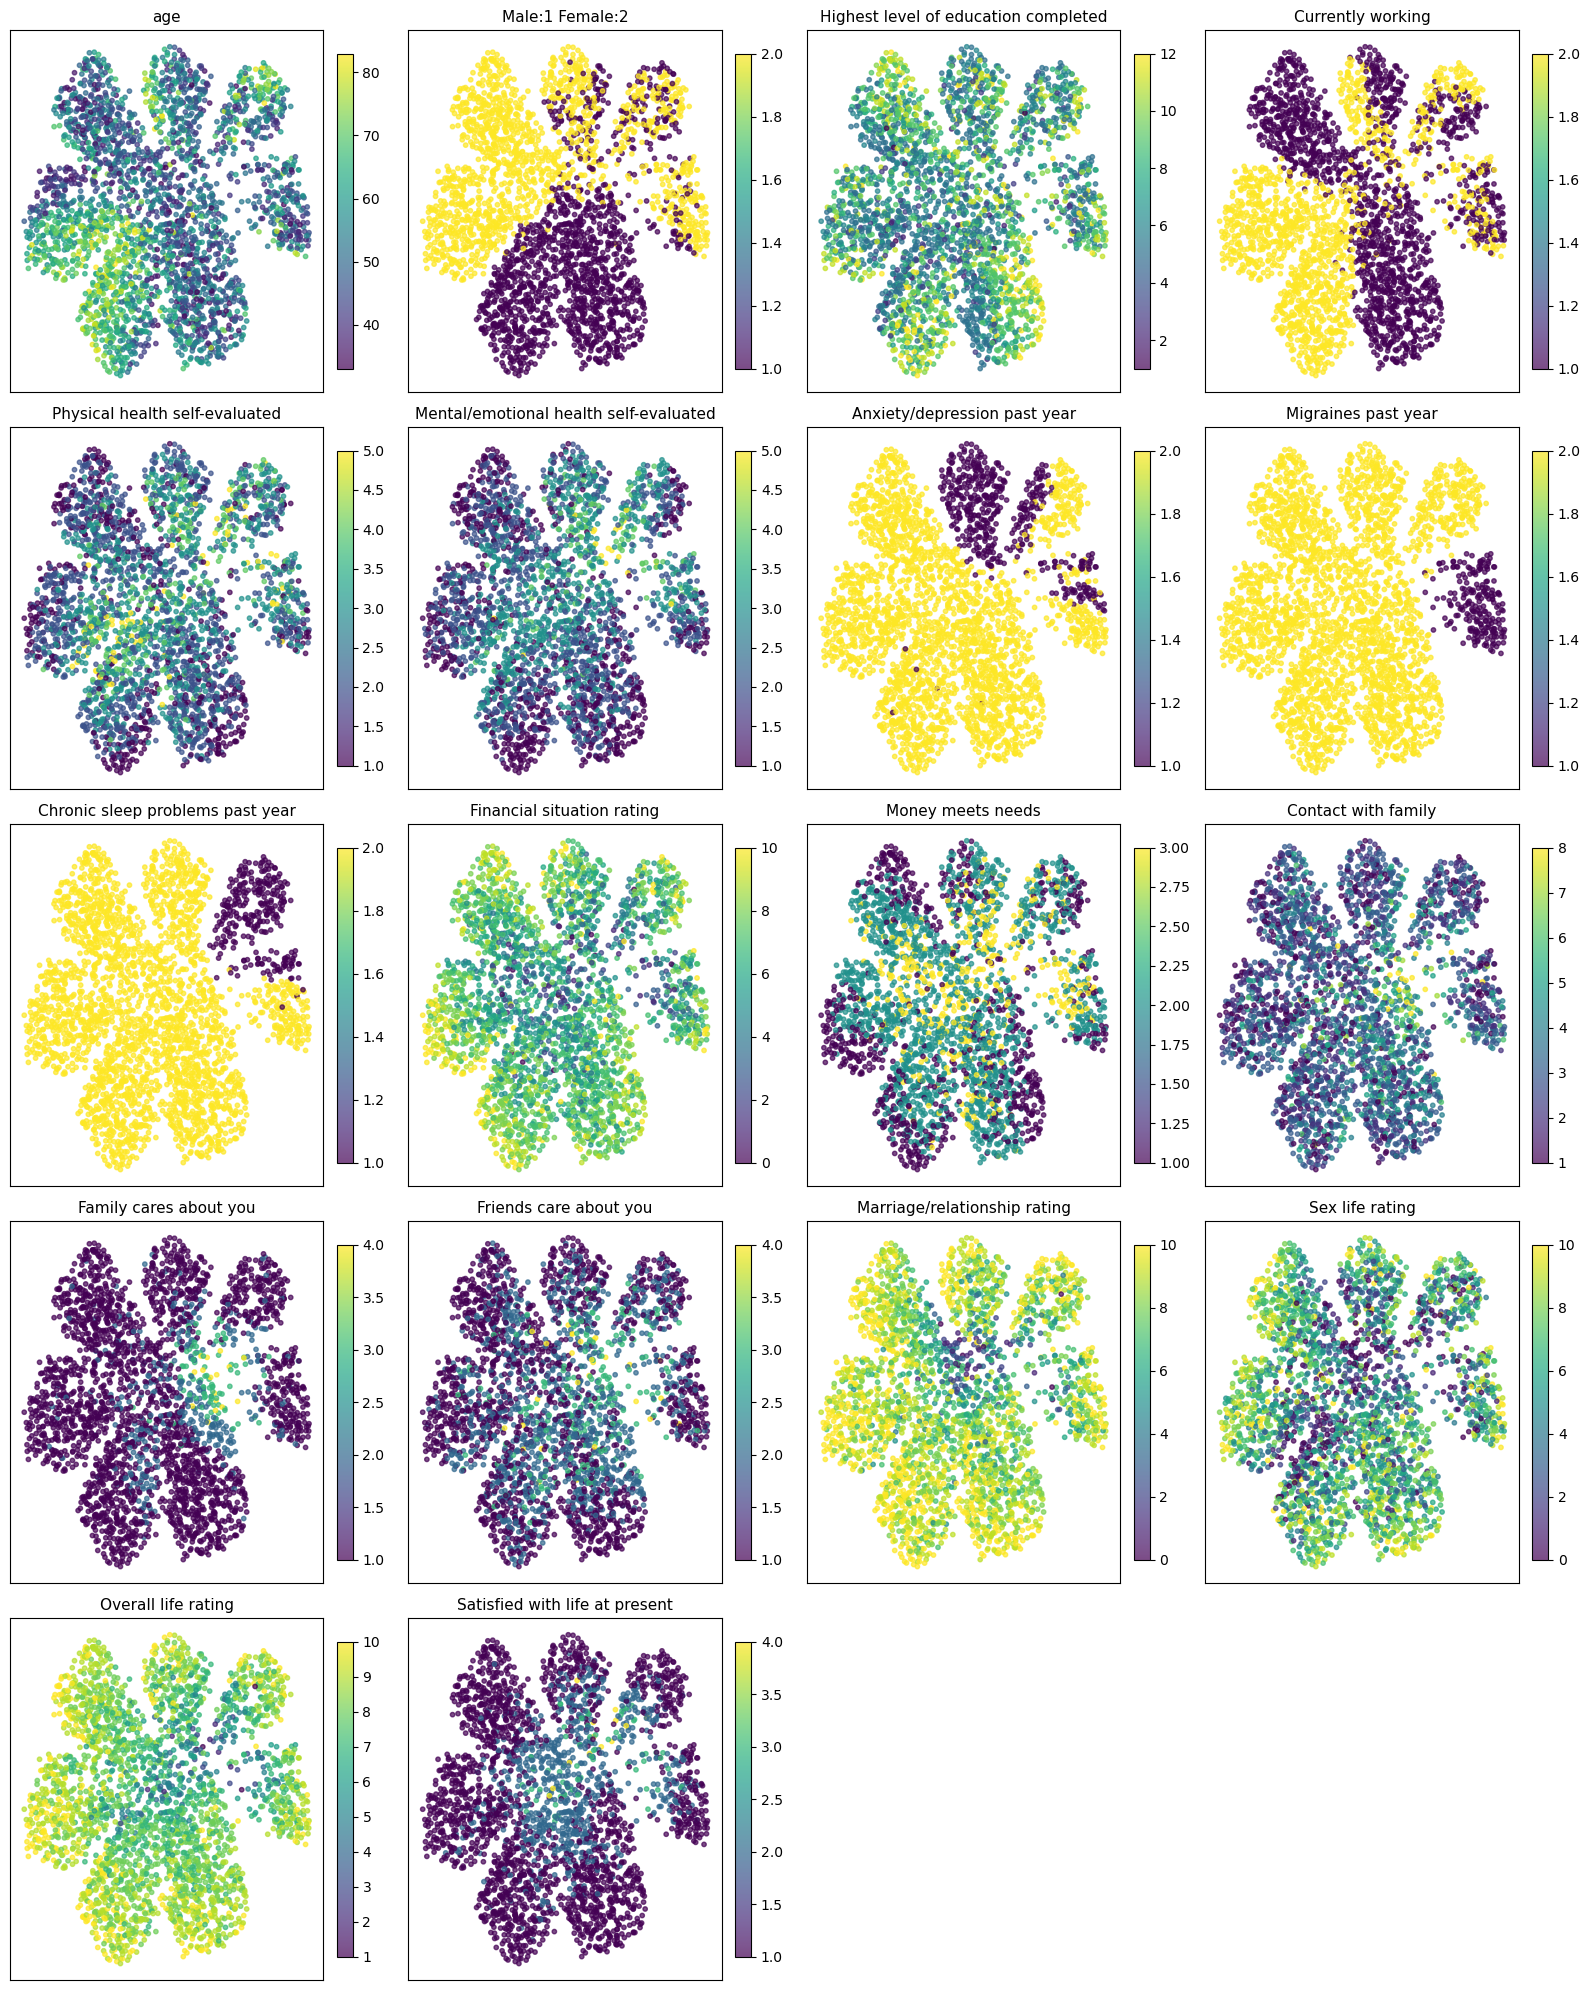

In [49]:
# Number of variables to plot
variables = list(midus_vars.values())  # using renamed columns in df_clean
n_vars = len(variables)

# Define grid size
n_cols = 4
n_rows = math.ceil(n_vars / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    ax = axes[i]
    scatter = ax.scatter(df_umapo["UMAP1"], df_umapo["UMAP2"], 
                         c=df_umapo[var], cmap='viridis', s=10, alpha=0.7)
    ax.set_title(var, fontsize=11)
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_xlim([5,15])
    #ax.set_ylim([-1,14])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('plots/first.png')

In [40]:
# Dictionary of variable codes and descriptions
personality_vars = {
    "B1SE1A": "Not afraid to voice opinions in opposition",
    "B1SE1B": "In charge of situation in which I live",
    "B1SE1C": "Not interested activities expand horizons",
    "B1SE1D": "Most see me as loving/affectionate",
    "B1SE1PP": "Feel good when compare myself to friends",
    "B1SPWBA2": "Autonomy (Psychological Well-Being 7-item)",
    "B1SPWBE2": "Environmental Mastery (Psychological Well-Being 7-item)",
    "B1SPWBG2": "Personal Growth (Psychological Well-Being 7-item)",
    "B1SPWBR2": "Positive Relations with Others (Psychological Well-Being 7-item)",
    "B1SPWBU2": "Purpose in Life (Psychological Well-Being 7-item)",
    "B1SPWBS2": "Self-Acceptance (Psychological Well-Being 7-item)",
    "B1SE6A": "Outgoing describes you how well",
    "B1SE6B": "Helpful describes you how well",
    "B1SE6C": "Moody describes you how well",
    "B1SE6D": "Organized describes you how well",
    "B1SE6E": "Self-confident describes you how well",
    "B1SE6F": "Friendly describes you how well",
    "B1SE6G": "Warm describes you how well",
    "B1SE6H": "Worrying describes you how well",
    "B1SE6I": "Responsible describes you how well",
    "B1SE6J": "Forceful describes you how well",
    "B1SE6K": "Lively describes you how well",
    "B1SE6L": "Caring describes you how well",
    "B1SE6M": "Nervous describes you how well",
    "B1SE6N": "Creative describes you how well",
    "B1SE6O": "Assertive describes you how well",
    "B1SE6P": "Hardworking describes you how well",
    "B1SE6Q": "Imaginative describes you how well",
    "B1SE6R": "Softhearted describes you how well",
    "B1SE6S": "Calm describes you how well",
    "B1SE6T": "Outspoken describes you how well",
    "B1SE6U": "Intelligent describes you how well",
    "B1SE6V": "Curious describes you how well",
    "B1SE6W": "Active describes you how well",
    "B1SE6X": "Careless describes you how well",
    "B1SE6Y": "Broad minded describes you how well",
    "B1SE6Z": "Sympathetic describes you how well",
    "B1SE6AA": "Talkative describes you how well",
    "B1SE6BB": "Sophisticated describes you how well",
    "B1SE6CC": "Adventurous describes you how well",
    "B1SE6DD": "Dominant describes you how well",
    "B1SE6EE": "Thorough describes you how well",
    "B1SAGENC": "Agency Personality Trait",
    "B1SAGREE": "Agreeableness Personality Trait",
    "B1SEXTRA": "Extraversion Personality Trait",
    "B1SNEURO": "Neuroticism Personality Trait",
    "B1SCONS1": "Conscientiousness Personality Trait (Parallel M1 items)",
    "B1SCONS2": "Conscientiousness Personality Trait (M1 items + 1 additional)",
    "B1SOPEN": "Openness Personality Trait",
    "B1SE7A": "Like spend free time with friends, rather than alone",
    "B1SE7B": "Faced with decision, weigh possibilities",
    "B1SE7C": "Seek friend when unhappy, rather than alone",
    "B1SE7D": "Fun/exciting to be in an earthquake",
    "B1SE7E": "In social situation, like else to lead",
    "B1SE7F": "Like think things over before doing them",
    "B1SE7G": "People often try to take advantage of me",
    "B1SE7H": "I am a warm person, not cool/distant",
    "B1SE7I": "When angry I am ready to hit someone",
    "B1SE7J": "Effective talking people into things",
    "B1SE7K": "My mood often goes up and down",
    "B1SE7L": "Keep working on problems after others give up",
    "B1SE7M": "Opposed censor because against free speech",
    "B1SE7N": "I'm very good at influencing people",
    "B1SE7O": "I like to try difficult things",
    "B1SE7P": "More successful if people didn't make difficulty",
    "B1SE7Q": "Usually find ways to liven up my day",
    "B1SE7R": "I like hard work",
    "B1SE7S": "People often say mean things about me",
    "B1SE7T": "Enjoy hurting by saying mean things",
    "B1SE7U": "People should obey moral law more strict",
    "B1SE7V": "Fun learning to walk tightrope",
    "B1SE7W": "Get upset/tense when think about day",
    "B1SE7X": "Minor setbacks irritate me too much",
    "B1SE7Y": "I am a cautious person",
    "B1SE7Z": "Don't like religious authority overturned",
    "B1SE7AA": "Life is a great adventure",
    "B1SE7BB": "When people insult me, try to get even",
    "B1SE7CC": "Often prefer not have others around me",
    "B1SE7DD": "When make decisions, others turn to me",
    "B1SE7EE": "Sometimes just like to hit someone",
    "B1SE7FF": "Set very high standards for self in work",
    "B1SE7GG": "Have something exciting to look forward",
    "B1SMPQWB": "Well-Being (Multidimensional Personality)",
    "B1SMPQSP": "Social Potency (Multidimensional Personality)",
    "B1SMPQAC": "Achievement (Multidimensional Personality)",
    "B1SMPQSC": "Social Closeness (Multidimensional Personality)",
    "B1SMPQSR": "Reactivity (Multidimensional Personality)",
    "B1SMPQAG": "Aggression (Multidimensional Personality)",
    "B1SMPQAL": "Alienation (Multidimensional Personality)",
    "B1SMPQCN": "Control (Multidimensional Personality)",
    "B1SMPQTR": "Traditionalism (Multidimensional Personality)",
    "B1SMPQHA": "Harm Avoidance (Multidimensional Personality)",
    "B1SE10A": "In uncertain times, usually expect best",
    "B1SE10B": "Something can go wrong for me, it will",
    "B1SE10C": "Optimistic about my future"
}



KeyError: 'orig_index'